In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, classification_report, mean_squared_error, r2_score, mean_absolute_error
from sklearn.tree import plot_tree

In [2]:
def wrangle(file_path):
    df = pd.read_csv(file_path)
    # Replace spaces with underscores in column names to match the trained model
    df.columns = df.columns.str.replace(' ', '_')
    
    return df


In [3]:
wine_df = wrangle('../data/winequality-red.csv')
wine_df.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
wine_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed_acidity         1599 non-null   float64
 1   volatile_acidity      1599 non-null   float64
 2   citric_acid           1599 non-null   float64
 3   residual_sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free_sulfur_dioxide   1599 non-null   float64
 6   total_sulfur_dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [5]:
wine_df.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed_acidity,1599.0,8.319637,1.741096,4.60000,7.1000,7.90000,9.200000,15.90000
volatile_acidity,1599.0,0.527821,0.179060,0.12000,0.3900,0.52000,0.640000,1.58000
citric_acid,1599.0,0.270976,0.194801,0.00000,0.0900,0.26000,0.420000,1.00000
residual_sugar,1599.0,2.538806,1.409928,0.90000,1.9000,2.20000,2.600000,15.50000
chlorides,1599.0,0.087467,0.047065,0.01200,0.0700,0.07900,0.090000,0.61100
free_sulfur_dioxide,1599.0,15.874922,10.460157,1.00000,7.0000,14.00000,21.000000,72.00000
total_sulfur_dioxide,1599.0,46.467792,32.895324,6.00000,22.0000,38.00000,62.000000,289.00000
density,1599.0,0.996747,0.001887,0.99007,0.9956,0.99675,0.997835,1.00369
pH,1599.0,3.311113,0.154386,2.74000,3.2100,3.31000,3.400000,4.01000
sulphates,1599.0,0.658149,0.169507,0.33000,0.5500,0.62000,0.730000,2.00000


In [6]:
wine_df.isnull().sum()

fixed_acidity           0
volatile_acidity        0
citric_acid             0
residual_sugar          0
chlorides               0
free_sulfur_dioxide     0
total_sulfur_dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [7]:
{"am": 234}.values()

dict_values([234])

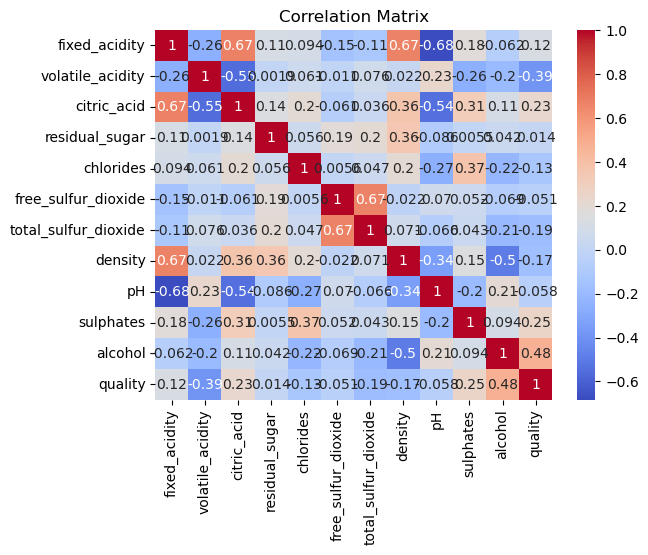

In [8]:
corr_matrix = wine_df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

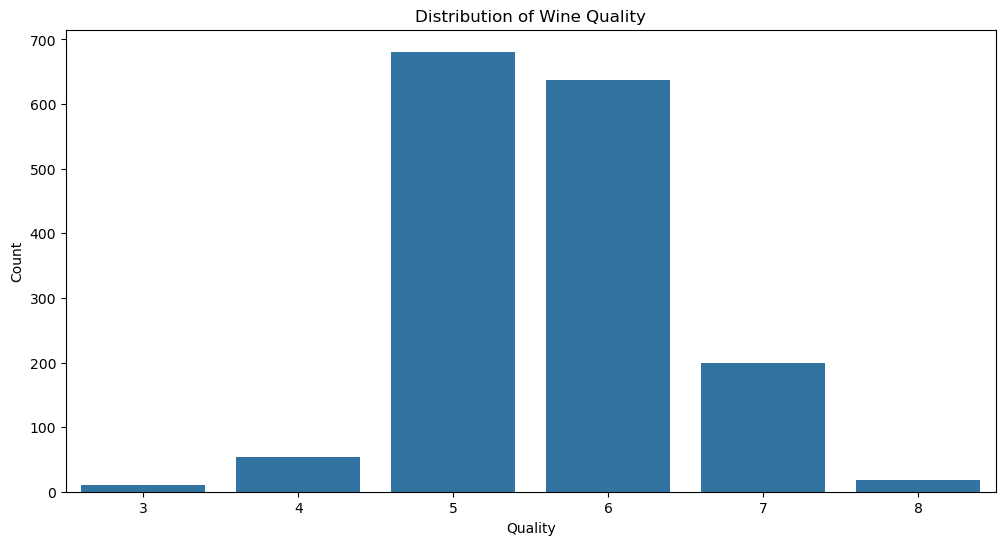

In [9]:
plt.figure(figsize=(12, 6))
sns.countplot(x='quality', data=wine_df)
plt.title('Distribution of Wine Quality')
plt.xlabel('Quality')
plt.ylabel('Count')
plt.show()

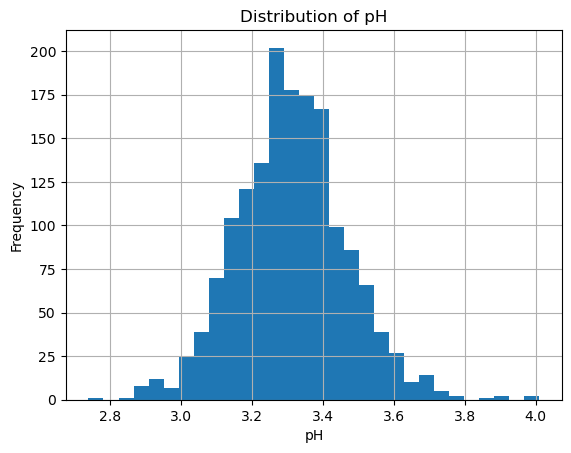

In [10]:
wine_df['pH'].hist(bins=30)
plt.title('Distribution of pH')
plt.xlabel('pH')
plt.ylabel('Frequency')
plt.show()

In [11]:
x = wine_df.drop('quality', axis=1)
y = wine_df['quality']

x.round()
y.round()


0       5
1       5
2       5
3       6
4       5
       ..
1594    5
1595    6
1596    6
1597    5
1598    6
Name: quality, Length: 1599, dtype: int64

In [12]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.15, random_state= 42)

#Experiment 1a: Decision Tree Classifer

In [14]:
wine_model = DecisionTreeClassifier(max_depth=8, random_state=42, min_samples_split=3, min_samples_leaf=6)
wine_model.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=8, min_samples_leaf=6, min_samples_split=3,
                       random_state=42)

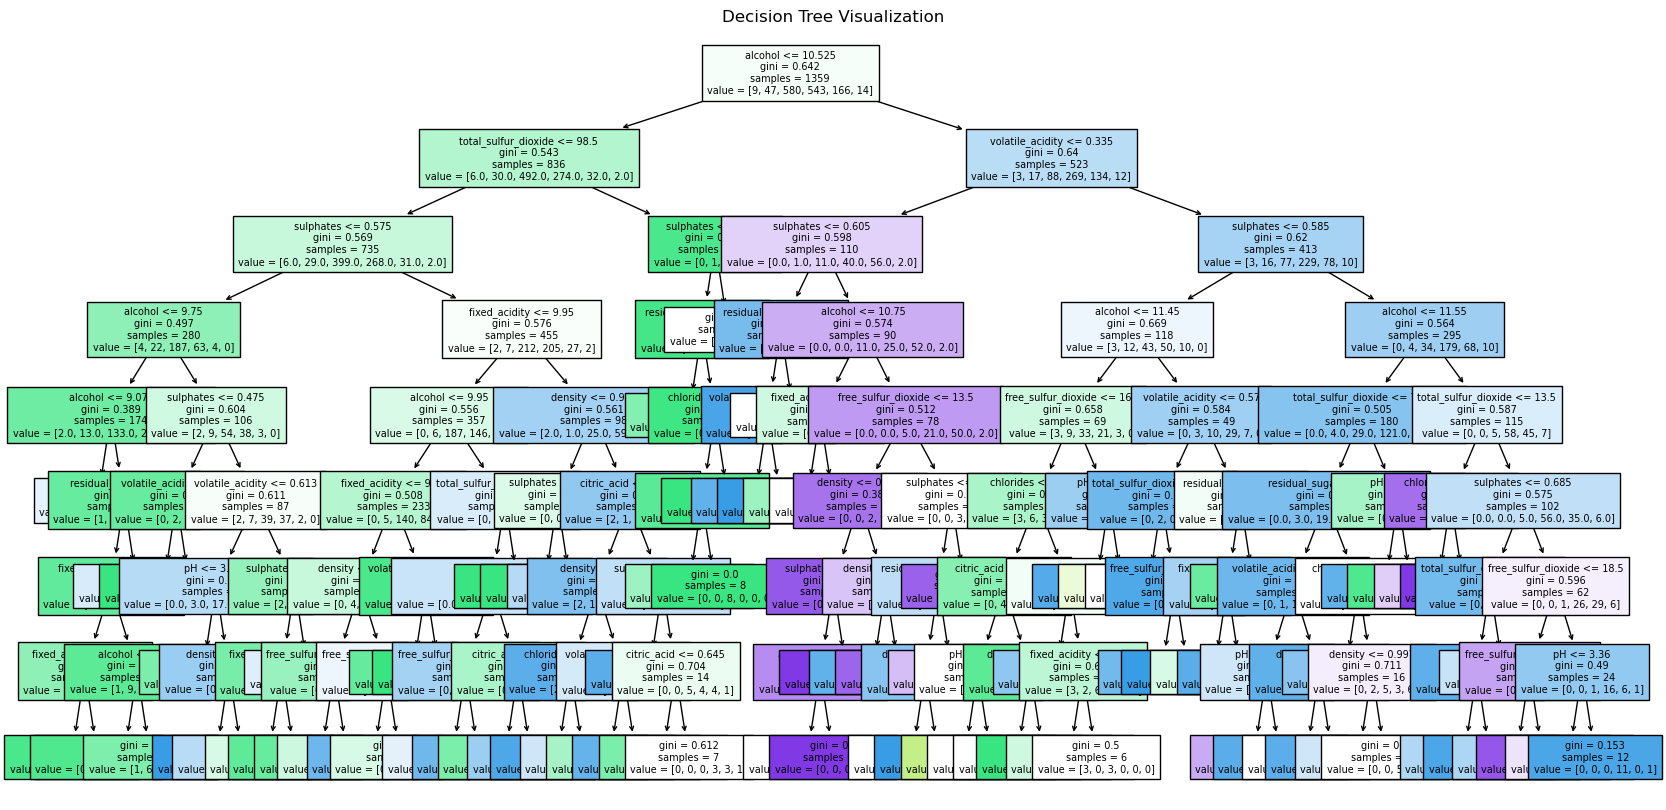

In [15]:
plt.figure(figsize=(20, 10))
plot_tree(wine_model, feature_names=list(x.columns.values), filled=True, fontsize=7)
plt.title("Decision Tree Visualization")
plt.show()

In [16]:
wine_model.score(x_train, y_train)

0.7358351729212657

In [17]:
y_train_pred = pd.DataFrame(wine_model.predict(x_train), columns = ['quality'])
y_test_pred = pd.DataFrame(wine_model.predict(x_test))

In [18]:
y_train_pred.head(10)

,quality
0,5
1,5
2,6
3,7
4,5
5,6
6,6
7,6
8,6
9,5


In [19]:
y_test_pred.head(10)

,0
0,5
1,5
2,6
3,6
4,6
5,5
6,5
7,5
8,5
9,6


In [20]:
print("Training Accuracy:", accuracy_score(y_train, y_train_pred))
print("Test Accuracy:", accuracy_score(y_test, y_test_pred))
print('Classification Report: \n', classification_report(y_test, y_test_pred))

Training Accuracy: 0.7358351729212657
Test Accuracy: 0.5875
Classification Report: 
               precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         6
           5       0.63      0.75      0.69       101
           6       0.55      0.57      0.56        95
           7       0.61      0.33      0.43        33
           8       0.00      0.00      0.00         4

    accuracy                           0.59       240
   macro avg       0.30      0.28      0.28       240
weighted avg       0.57      0.59      0.57       240



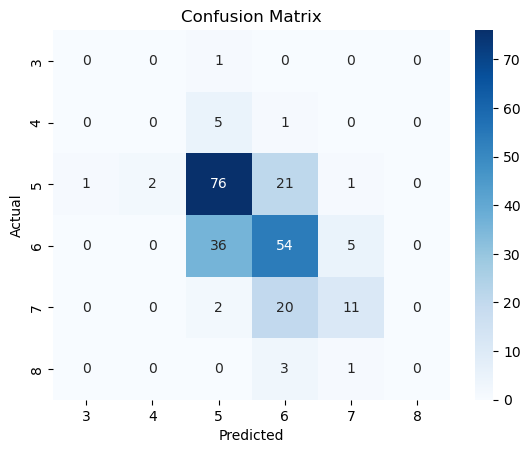

In [21]:
conf_matrix = confusion_matrix(y_test, y_test_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['3', '4', '5', '6', '7', '8'], yticklabels=['3', '4', '5', '6', '7', '8'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

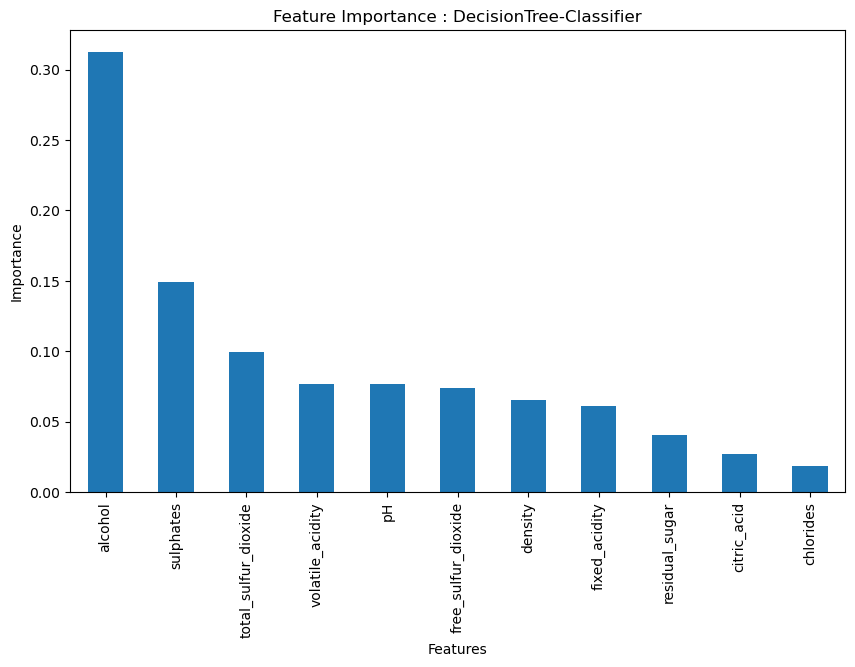

In [22]:
importances = pd.Series(wine_model.feature_importances_, index=x.columns)
importances.sort_values(ascending=False).plot(kind='bar', figsize=(10, 6), title='Feature Importance : DecisionTree-Classifier')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.show()

#Experiment 1b: Random Forest Classifer

In [24]:
wine_rmodel = RandomForestClassifier(n_estimators=100, random_state=42, max_depth=16, min_samples_split=3, min_samples_leaf=2)
wine_rmodel.fit(x_train, y_train)

RandomForestClassifier(max_depth=16, min_samples_leaf=2, min_samples_split=3,
                       random_state=42)

In [25]:
wine_rmodel.score(x_train, y_train)

0.9742457689477557

In [26]:
y_train_pred = pd.DataFrame(wine_rmodel.predict(x_train), columns = ['quality'])
y_test_pred = pd.DataFrame(wine_rmodel.predict(x_test), columns=['quality'])

In [27]:
y_train_pred.head(10)

,quality
0,5
1,5
2,6
3,7
4,6
5,7
6,5
7,6
8,6
9,5


In [28]:
print("Training Accuracy:", accuracy_score(y_train, y_train_pred))
print("Test Accuracy:", accuracy_score(y_test, y_test_pred))
print('Classification Report: \n', classification_report(y_test, y_test_pred))

Training Accuracy: 0.9742457689477557
Test Accuracy: 0.6625
Classification Report: 
               precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         6
           5       0.74      0.80      0.77       101
           6       0.62      0.67      0.64        95
           7       0.52      0.42      0.47        33
           8       0.00      0.00      0.00         4

    accuracy                           0.66       240
   macro avg       0.31      0.32      0.31       240
weighted avg       0.63      0.66      0.64       240



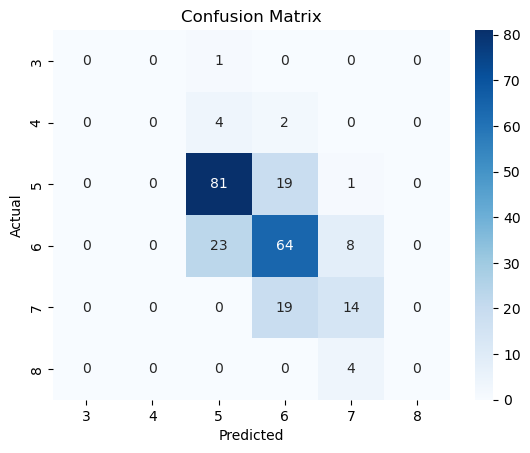

In [29]:
conf_matrix = confusion_matrix(y_test, y_test_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['3', '4', '5', '6', '7', '8'], yticklabels=['3', '4', '5', '6', '7', '8'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Experiment 2a: Random Forest Regressor

In [31]:
wine_Rrmodel = RandomForestRegressor(n_estimators=100, random_state=42, max_depth=14, min_samples_leaf=1)
wine_Rrmodel.fit(x_train, y_train)

RandomForestRegressor(max_depth=14, random_state=42)

In [32]:
wine_Rrmodel.score(x_train, y_train)

0.9111268099643666

In [33]:
y_train_pred = pd.DataFrame(wine_Rrmodel.predict(x_train), columns = ['quality'])
y_test_pred = pd.DataFrame(wine_Rrmodel.predict(x_test), columns=['quality'])

y_train_pred = y_train_pred.round()
y_test_pred = y_test_pred.round()

In [34]:
y_train_pred.head(10)

,quality
0,5.0
1,5.0
2,6.0
3,7.0
4,6.0
5,7.0
6,5.0
7,6.0
8,6.0
9,5.0


In [35]:
y_test_pred.head(10)

,quality
0,5.0
1,5.0
2,5.0
3,5.0
4,6.0
5,5.0
6,5.0
7,5.0
8,6.0
9,6.0


In [36]:
print('Mean Squared Error: ', mean_squared_error(y_test, y_test_pred))
print('Root Mean Squared Error: ', np.sqrt(mean_squared_error(y_test, y_test_pred)))
print('Mean Absolute Error: ', mean_absolute_error(y_test, y_test_pred))
print('R2 Score: ', r2_score(y_test, y_test_pred))

Mean Squared Error:  0.4166666666666667
Root Mean Squared Error:  0.6454972243679028
Mean Absolute Error:  0.375
R2 Score:  0.373286329808069


In [37]:
print("Training Accuracy:", accuracy_score(y_train, y_train_pred))
print("Test Accuracy:", accuracy_score(y_test, y_test_pred))
print('Classification Report: \n', classification_report(y_test, y_test_pred))

Training Accuracy: 0.94186902133922
Test Accuracy: 0.6458333333333334
Classification Report: 
               precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         6
           5       0.72      0.83      0.77       101
           6       0.58      0.63      0.61        95
           7       0.55      0.33      0.42        33
           8       0.00      0.00      0.00         4

    accuracy                           0.65       240
   macro avg       0.31      0.30      0.30       240
weighted avg       0.61      0.65      0.62       240



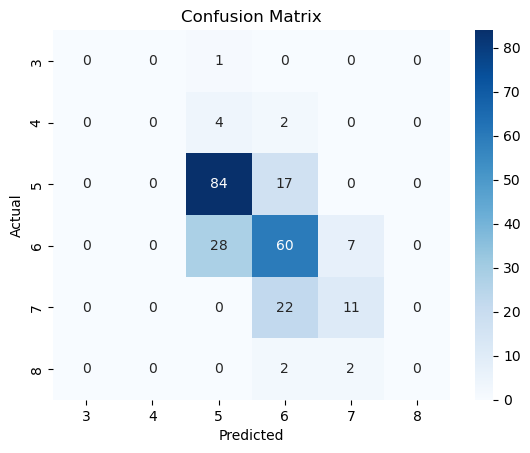

In [38]:
conf_matrix = confusion_matrix(y_test, y_test_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['3', '4', '5', '6', '7', '8'], yticklabels=['3', '4', '5', '6', '7', '8'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Experiment 2b: Decision Tree Regressor

In [40]:
wine_Dtmodel = DecisionTreeRegressor(random_state=42)
wine_Dtmodel.fit(x_train, y_train)

DecisionTreeRegressor(random_state=42)

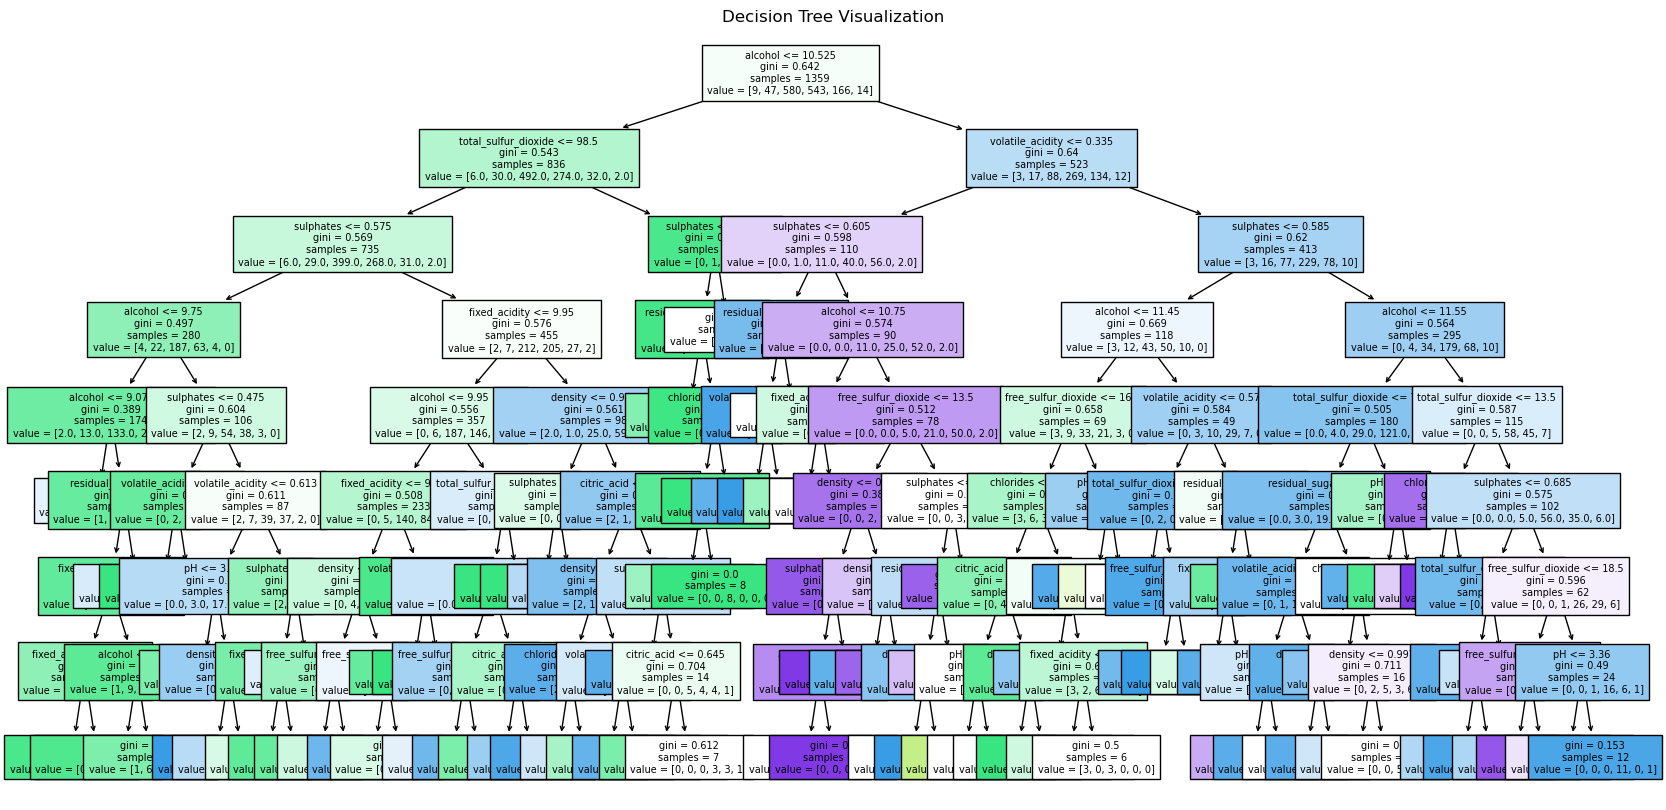

In [41]:
plt.figure(figsize=(20, 10))
plot_tree(wine_model, feature_names=x.columns, filled=True, fontsize=7)
plt.title("Decision Tree Visualization")
plt.show()

In [42]:
wine_Dtmodel.score(x_train, y_train)

1.0

In [43]:
y_train_pred = pd.DataFrame(wine_Dtmodel.predict(x_train), columns = ['quality'])
y_test_pred = pd.DataFrame(wine_Dtmodel.predict(x_test), columns=['quality'])

y_train_pred = y_train_pred.round()
y_test_pred = y_test_pred.round()

In [44]:
y_train_pred.head(10)

,quality
0,5.0
1,4.0
2,6.0
3,7.0
4,6.0
5,7.0
6,5.0
7,6.0
8,6.0
9,5.0


In [45]:
print('Mean Squared Error: ', mean_squared_error(y_test, y_test_pred))
print('Root Mean Squared Error: ', np.sqrt(mean_squared_error(y_test, y_test_pred)))
print('Mean Absolute Error: ', mean_absolute_error(y_test, y_test_pred))
print('R2 Score: ', r2_score(y_test, y_test_pred))

Mean Squared Error:  0.5958333333333333
Root Mean Squared Error:  0.7719024117939607
Mean Absolute Error:  0.45416666666666666
R2 Score:  0.10379945162553861


In [46]:
print("Training Accuracy:", accuracy_score(y_train, y_train_pred))
print("Test Accuracy:", accuracy_score(y_test, y_test_pred))
print('Classification Report: \n', classification_report(y_test, y_test_pred))

Training Accuracy: 1.0
Test Accuracy: 0.6083333333333333
Classification Report: 
               precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.09      0.17      0.12         6
           5       0.72      0.70      0.71       101
           6       0.61      0.63      0.62        95
           7       0.54      0.42      0.47        33
           8       0.00      0.00      0.00         4

    accuracy                           0.61       240
   macro avg       0.33      0.32      0.32       240
weighted avg       0.62      0.61      0.61       240



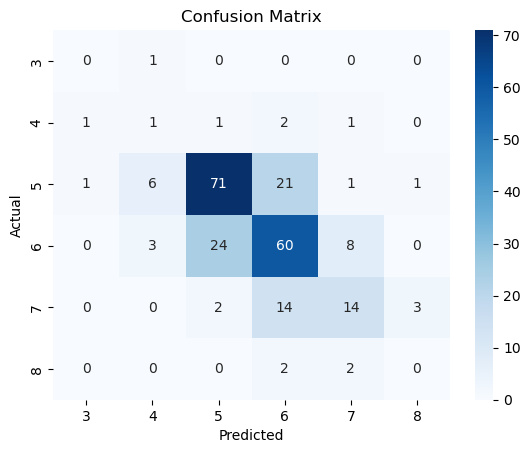

In [47]:
conf_matrix = confusion_matrix(y_test, y_test_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['3', '4', '5', '6', '7', '8'], yticklabels=['3', '4', '5', '6', '7', '8'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

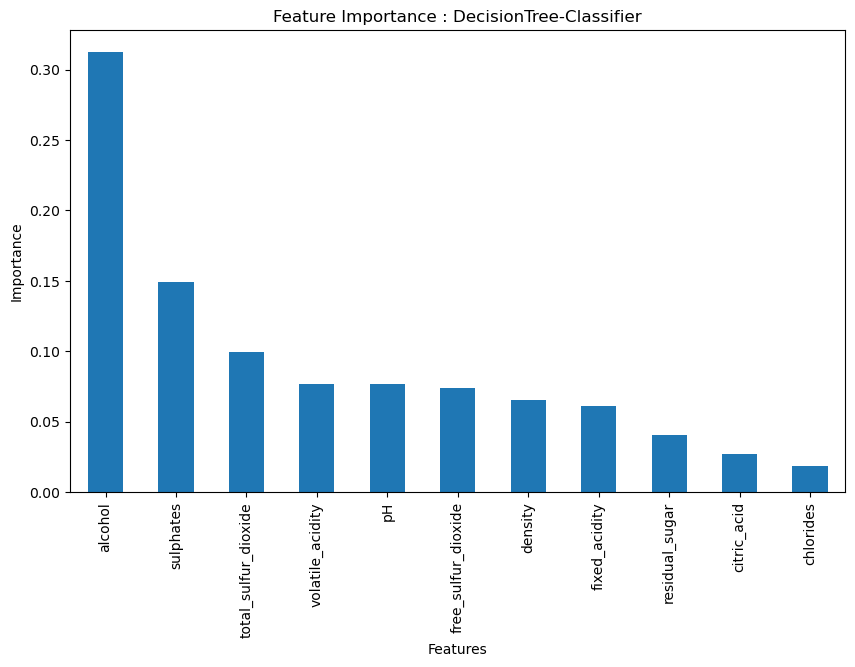

In [48]:
importances = pd.Series(wine_model.feature_importances_, index=x.columns)
importances.sort_values(ascending=False).plot(kind='bar', figsize=(10, 6), title='Feature Importance : DecisionTree-Classifier')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.show()

# Conclusion

Based on all of the analysis by the various models, the RandomForrest models i.e Classifiers and Regressors have the highest test accuracy. I believe the Random Forest Models gave a better result because of the robustness of the model.
Also, after analysis  I believe my model and data cleaning stil needs work, so this might be the best i can do for now.

## Save model

In [52]:
import pickle
with open('../model/wine_rmodel.pkl', 'wb') as model_file:
    pickle.dump(wine_rmodel, model_file)

## Load model

In [54]:
model = pickle.load(open('../model/wine_rmodel.pkl', 'rb'))

In [55]:
model

RandomForestClassifier(max_depth=16, min_samples_leaf=2, min_samples_split=3,
                       random_state=42)

In [56]:
[x_test.values[0]]

[array([ 7.7   ,  0.56  ,  0.08  ,  2.5   ,  0.114 , 14.    , 46.    ,
         0.9971,  3.24  ,  0.66  ,  9.6   ])]

In [57]:
model.predict([x_test.values[0]])

array([5], dtype=int64)

In [58]:
np.asarray(list({"am": 234, "is":123}.values()))

array([234, 123])

In [59]:
x_test.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol
803,7.7,0.56,0.08,2.50,0.114,14.0,46.0,0.9971,3.24,0.66,9.6
124,7.8,0.50,0.17,1.60,0.082,21.0,102.0,0.9960,3.39,0.48,9.5
350,10.7,0.67,0.22,2.70,0.107,17.0,34.0,1.0004,3.28,0.98,9.9
682,8.5,0.46,0.31,2.25,0.078,32.0,58.0,0.9980,3.33,0.54,9.8
1326,6.7,0.46,0.24,1.70,0.077,18.0,34.0,0.9948,3.39,0.60,10.6


In [60]:
x_test.dtypes

fixed_acidity           float64
volatile_acidity        float64
citric_acid             float64
residual_sugar          float64
chlorides               float64
free_sulfur_dioxide     float64
total_sulfur_dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
dtype: object

In [ ]:
import nest_asyncio
import uvicorn
from main import app  # Import the FastAPI app from main.py

# Allow FastAPI to run inside Jupyter
nest_asyncio.apply()

# Start the server
uvicorn.run(app, host="127.0.0.1", port=8000)


INFO:     Started server process [6252]
INFO:     Waiting for application startup.
INFO:     Application startup complete.
INFO:     Uvicorn running on http://127.0.0.1:8000 (Press CTRL+C to quit)


INFO:     127.0.0.1:47717 - "GET / HTTP/1.1" 200 OK
INFO:     127.0.0.1:47716 - "GET /docs HTTP/1.1" 200 OK
INFO:     127.0.0.1:47716 - "GET /openapi.json HTTP/1.1" 200 OK
Received raw request: {'fixed_acidity': 7.4, 'volatile_acidity': 0.7, 'citric_acid': 0.0, 'residual_sugar': 1.9, 'chlorides': 0.076, 'free_sulfur_dioxide': 11.0, 'total_sulfur_dioxide': 34.0, 'density': 0.9978, 'pH': 3.51, 'sulphates': 0.56, 'alcohol': 9.4}
INFO:     127.0.0.1:47741 - "POST /predict/ HTTP/1.1" 200 OK
Received raw request: {'fixed_acidity': 7.4, 'volatile_acidity': 0.7, 'citric_acid': 0.7, 'residual_sugar': 1.9, 'chlorides': 0.076, 'free_sulfur_dioxide': 11.0, 'total_sulfur_dioxide': 34.0, 'density': 0.9978, 'pH': 3.51, 'sulphates': 0.56, 'alcohol': 9.4}
INFO:     127.0.0.1:47767 - "POST /predict/ HTTP/1.1" 200 OK
Received raw request: {'fixed_acidity': 7.6, 'volatile_acidity': 0.9, 'citric_acid': 3.7, 'residual_sugar': 1.9, 'chlorides': 0.096, 'free_sulfur_dioxide': 14.0, 'total_sulfur_dioxide': 34.0

In [ ]:
##!pip install fastapi uvicorn pydantic
#!pip install nest-asyncio

In [ ]:
#python -m unicorn main:app --reload

In [ ]:
# {
#   "fixed_acidity": 7.7,
#   "volatile_acidity": 0.56,
#   "citric_acid": 0.08,
#   "residual_sugar": 2.5,
#   "chlorides": 0.114,
#   "free_sulfur_dioxide": 14.,
#   "total_sulfur_dioxide": 46.,
#   "density": 0.9971,
#   "pH": 3.24,
#   "sulphates": 0.66,
#   "alcohol": 9.6
# }

In [ ]:
# from typing import Union

# from fastapi import FastAPI
# from pydantic import BaseModel
# import pickle
# from sklearn.ensemble import RandomForestRegressor
# import pandas as pd
# import numpy as np

# app = FastAPI()


# class Entry(BaseModel):
#     fixed_acidity: float
#     volatile_acidity: float
#     citric_acid: float
#     redisual_sugar: float
#     chlorides: float
#     free_sulfur_dioxide: float
#     total_sulfur_dioxide: float
#     density: float
#     pH: float
#     sulphates: float
#     alcohol: float

# @app.get("/")
# def read_root():
#     return {"Project": "Wine Prediction Project."}


# @app.post("/prediction")
# def make_prediction(entry: Entry):
#     """Takes in a request with the features of a wine and returns the predicted quality of the wine."""
    
#     data = pd.read_csv('./data/winequality-red.csv')
#     data.drop('quality', axis=1, inplace=True)

#     model = pickle.load(open('./model/wine_rmodel.pkl', 'rb'))
    
#     # test_df = pd.DataFrame([entry.dict().values()], columns=data.columns)
#     print(list(entry.dict().values()))
#     # print()
#     # return {"result": model.predict(test_df)}
#     return model.predict([np.array(list(entry.dict().values()))])



# # from fastapi import FastAPI
# # import pickle
# # import numpy as np
# # import pandas as pd
# # from pydantic import BaseModel

# # # Load the saved model
# # model_path = "../model/wine_rmodel.pkl"
# # with open(model_path, "rb") as model_file:
# #     model = pickle.load(model_file)

# # # Initialize FastAPI
# # app = FastAPI()

# # # Define request body schema
# # class WineFeatures(BaseModel):
# #     fixed_acidity: float
# #     volatile_acidity: float
# #     citric_acid: float
# #     residual_sugar: float
# #     chlorides: float
# #     free_sulfur_dioxide: float
# #     total_sulfur_dioxide: float
# #     density: float
# #     pH: float
# #     sulphates: float
# #     alcohol: float

# # @app.get("/")
# # def home():
# #     return {"message": "Wine Quality Prediction API"}

# # @app.post("/predict/")
# # def predict_wine_quality(features: WineFeatures):
# #     # Convert input data to DataFrame
# #     input_data = pd.DataFrame([features.dict()])
# #     prediction = model.predict(input_data)
# #     return {"predicted_quality": int(prediction[0])}

# # # Run the app using: uvicorn filename:app --reload

